<a href="https://colab.research.google.com/github/afrahhassan/afrahhassan/blob/main/Copy_of_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
## Task
This report will analyse the methodology used to complete assignment 2 of the course Machine Learning (COSC2673/2793). The objective of the assignment is to develop a machine-learning system that can classify traffic sign images.

The project is divided into two tasks:


*   Classify images according to the shape of the given image.
*    Classify images according to type.



## Approach
Our goal is to be able to identify the best possible machine-learning algorithm to generate a model that can reliably and consistently predict whether the type of traffic sign is based on image recognition.

# **Contact to the Drive**

In [ ]:
from google.colab import drive
import os
import csv
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
from PIL import Image
from sklearn.preprocessing import LabelEncoder


In [ ]:
!cp -r "/content/drive/MyDrive/Assignment2" .

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Assignment2/trafficsigns_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

## **Extract Shape file**

In [ ]:

extract_to_path = '/content/drive/MyDrive/Assignment2'
shape_csv = '/content/drive/My Drive/Assignment2/shape_data.csv'

data_list = []

for root, dirs, files in os.walk(extract_to_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            full_path = os.path.join(root, file)
            class_name = os.path.basename(os.path.dirname(root))
            img = Image.open(full_path).convert('L')

            data_list.append({'image_path': full_path, 'shape_label': class_name})
data = pd.DataFrame(data_list)

encoder = LabelEncoder()

data['encoded_shape_label'] = encoder.fit_transform(data['shape_label'])

class_labels_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Mapping of classes to encoded labels:", class_labels_mapping)

data.to_csv(shape_csv, index=False)
print(f"CSV file has been created successfully with {len(data)} entries at {shape_csv}")

Mapping of classes to encoded labels: {'diamond': 0, 'hex': 1, 'round': 2, 'square': 3, 'triangle': 4}
CSV file has been created successfully with 3699 entries at /content/drive/My Drive/Assignment2/shape_data.csv


## **Extract Type file**

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import LabelEncoder

# Define the path to extract images and the output CSV file
extract_to_path = '/content/drive/MyDrive/Assignment2'
type_csv = '/content/drive/My Drive/Assignment2/type_data.csv'

data_list = []

for root, dirs, files in os.walk(extract_to_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            full_path = os.path.join(root, file)
            image_type = os.path.basename(root)  # Get the type of the image from the directory name
            data_list.append({'image_path': full_path, 'type_label': image_type})

data = pd.DataFrame(data_list)
encoder = LabelEncoder()

data['encoded_type_label'] = encoder.fit_transform(data['type_label'])

class_labels_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Mapping of classes to encoded labels:", class_labels_mapping)

# Save to CSV
data.to_csv(type_csv, index=False)

print(f"CSV file has been created successfully with {len(data)} entries at {type_csv}")


Mapping of classes to encoded labels: {'bicycle': 0, 'continue': 1, 'crossing': 2, 'giveway': 3, 'laneend': 4, 'limitedtraffic': 5, 'noentry': 6, 'noparking': 7, 'parking': 8, 'rightofway': 9, 'roundabout': 10, 'speed': 11, 'stop': 12, 'trafficdirective': 13, 'traveldirection': 14, 'warning': 15}
CSV file has been created successfully with 3699 entries at /content/drive/My Drive/Assignment2/type_data.csv


# **1. Data Exploration**
## **1.1 Image Visualization**

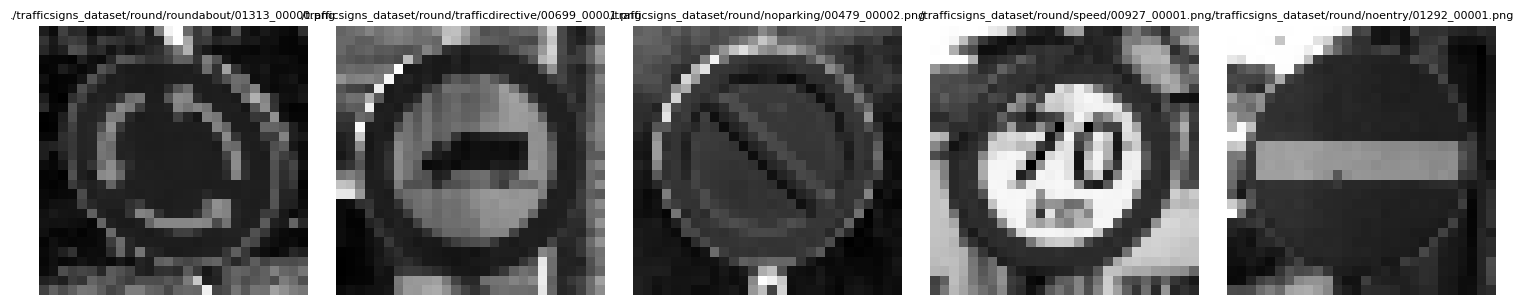

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the ZIP file and extraction directory
zip_path = '/content/drive/MyDrive/Assignment2/trafficsigns_dataset.zip'
extraction_path = './trafficsigns_dataset'

# Extracting the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Function to display images
def plot_images(images, titles, rows=1, cols=5, figsize=(15, 3)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.ravel()
    for i in range(len(images)):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(titles[i], fontsize=8)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Function to collect images from multiple directories
def collect_images(directory, extension, num_images=5, cols=5):
    images = []
    titles = []
    # Walk through each folder and subfolder
    for root, dirs, files in os.walk(directory):
        file_list = [os.path.join(root, file) for file in files if file.endswith(extension)]
        if file_list:
            selected_files = file_list[:num_images]  # Take up to num_images from each folder
            images.extend([mpimg.imread(img) for img in selected_files])
            titles.extend(selected_files)
        if len(images) >= cols:  # Limit the total number of images to display
            break
    return images, titles

# Collect and display images
image_extensions = ('.jpeg', '.jpg', '.png')
images, titles = collect_images(extraction_path, image_extensions, num_images=1, cols=5)  # Adjust num_images to pick from each folder
plot_images(images, titles)




**Observations:**
- The traffic sign images exhibit a wide variety of shapes.
- Some signs have distinctive shapes (e.g., triangles, circles, octagons), while others have more complex shapes.
- The images also vary in terms of background complexity, with some signs having simple backgrounds and others having more cluttered backgrounds.
- These observations suggest that a machine-learning algorithm will need to be able to handle a diverse range of image characteristics in order to accurately classify the traffic signs.

## **1.2 Load Data into DataFrame**

In [ ]:
import os
import cv2
import pandas as pd

def load_images_into_dataframes(data_dir):
    """
    Function to load images from a directory into separate Pandas DataFrames for shape and type.

    Args:
    - data_dir (str): Path to the directory containing the data.

    Returns:
    - shape_df (DataFrame): Pandas DataFrame containing shape data with images loaded.
    - type_df (DataFrame): Pandas DataFrame containing type data with images loaded.
    """
    shape_data = []
    type_data = []

    # Iterate through shape folders
    for shape_folder in os.listdir(data_dir):
        shape_folder_path = os.path.join(data_dir, shape_folder)

        # Skip non-directory files
        if not os.path.isdir(shape_folder_path):
            continue

        # Iterate through sign type folders
        for sign_type_folder in os.listdir(shape_folder_path):
            sign_type_folder_path = os.path.join(shape_folder_path, sign_type_folder)

            # Skip non-directory files
            if not os.path.isdir(sign_type_folder_path):
                continue

            # Iterate through image files
            for image_file in os.listdir(sign_type_folder_path):
                image_path = os.path.join(sign_type_folder_path, image_file)

                # Check if the file is an image
                if not image_path.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                    print(f"Skipping non-image file: {image_path}")
                    continue

                # Load the image
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                # Check if the image is null
                if image is None:
                    print(f"Skipping null image: {image_path}")
                    continue

                # Append image and labels to the respective data lists
                shape_data.append((image_path, image, shape_folder))
                type_data.append((image_path, image, sign_type_folder))

    # Create DataFrames from the collected data
    shape_df = pd.DataFrame(shape_data, columns=['image_path', 'image', 'shape_label'])
    type_df = pd.DataFrame(type_data, columns=['image_path', 'image', 'type_label'])

    return shape_df, type_df

# Example usage
# data_dir = "trafficsigns_dataset"
data_dir = "/content/drive/My Drive/Assignment2/trafficsigns_dataset"
shape_df, type_df = load_images_into_dataframes(data_dir)

print("Shape DataFrame:")
print(shape_df.head())

print("\nType DataFrame:")
print(type_df.head())


Skipping non-image file: /content/drive/My Drive/Assignment2/trafficsigns_dataset/triangle/warning/.DS_Store
Shape DataFrame:
                                          image_path  \
0  /content/drive/My Drive/Assignment2/trafficsig...   
1  /content/drive/My Drive/Assignment2/trafficsig...   
2  /content/drive/My Drive/Assignment2/trafficsig...   
3  /content/drive/My Drive/Assignment2/trafficsig...   
4  /content/drive/My Drive/Assignment2/trafficsig...   

                                               image shape_label  
0  [[60, 64, 47, 39, 46, 33, 30, 33, 19, 24, 15, ...      square  
1  [[73, 63, 59, 55, 46, 51, 52, 52, 61, 56, 57, ...      square  
2  [[255, 255, 255, 255, 255, 254, 254, 254, 255,...      square  
3  [[37, 31, 30, 31, 30, 42, 37, 36, 35, 37, 35, ...      square  
4  [[117, 88, 77, 96, 87, 72, 79, 91, 80, 78, 76,...      square  

Type DataFrame:
                                          image_path  \
0  /content/drive/My Drive/Assignment2/trafficsig...   
1  /co

## **1.3 Check the Data Set**

In [ ]:
# Check the size of the Shape DataFrame
print("DataFrame Size:")
print(shape_df.shape)

# Display basic information about the Shape DataFrame
print("\nDataFrame Information:")
print(shape_df.info())

# Display descriptive statistics of the Shape DataFrame
print("\nDataFrame Descriptive Statistics:")
print(shape_df.describe())

DataFrame Size:
(3699, 3)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_path   3699 non-null   object
 1   image        3699 non-null   object
 2   shape_label  3699 non-null   object
dtypes: object(3)
memory usage: 86.8+ KB
None

DataFrame Descriptive Statistics:
                                               image_path  \
count                                                3699   
unique                                               3699   
top     /content/drive/My Drive/Assignment2/trafficsig...   
freq                                                    1   

                                                    image shape_label  
count                                                3699        3699  
unique                                               3699           5  
top     [[60, 64, 47, 39, 46, 33, 30

In [ ]:
# Check the size of the Type DataFrame
print("DataFrame Size:")
print(type_df.shape)

# Display basic information about the Type DataFrame
print("\nDataFrame Information:")
print(type_df.info())

# Display descriptive statistics of the Type DataFrame
print("\nDataFrame Descriptive Statistics:")
print(type_df.describe())

DataFrame Size:
(3699, 3)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3699 non-null   object
 1   image       3699 non-null   object
 2   type_label  3699 non-null   object
dtypes: object(3)
memory usage: 86.8+ KB
None

DataFrame Descriptive Statistics:
                                               image_path  \
count                                                3699   
unique                                               3699   
top     /content/drive/My Drive/Assignment2/trafficsig...   
freq                                                    1   

                                                    image type_label  
count                                                3699       3699  
unique                                               3699         16  
top     [[60, 64, 47, 39, 46, 33, 30, 33, 19

In [ ]:
# Number of data points
num_data_points_1 = len(type_df)
print("Number of Data Points:", num_data_points_1)

num_data_points_2 = len(shape_df)
print("Number of Data Points:", num_data_points_2
      )

# Count of unique shapes
num_unique_shapes = shape_df['shape_label'].nunique()
print("Number of Unique Image Shapes:", num_unique_shapes)

# Count of unique types
num_unique_types = type_df['type_label'].nunique()
print("Number of Unique Image Types:", num_unique_types)

Number of Data Points: 3699
Number of Data Points: 3699
Number of Unique Image Shapes: 5
Number of Unique Image Types: 16


In [ ]:

# Number of each shape
shape_counts = shape_df['shape_label'].value_counts()
print("Number of Each Shape Type:")
print(shape_counts)

# Number of each type
type_counts = type_df['type_label'].value_counts()
print("\nNumber of Each Type:")
print(type_counts)

Number of Each Shape Type:
shape_label
round       1760
triangle     926
square       688
diamond      282
hex           43
Name: count, dtype: int64

Number of Each Type:
type_label
warning             695
noentry             375
speed               316
bicycle             285
rightofway          282
parking             276
noparking           242
giveway             231
continue            199
trafficdirective    195
limitedtraffic      125
traveldirection     124
laneend             118
roundabout           98
crossing             95
stop                 43
Name: count, dtype: int64


Samples from Shape DataFrame:


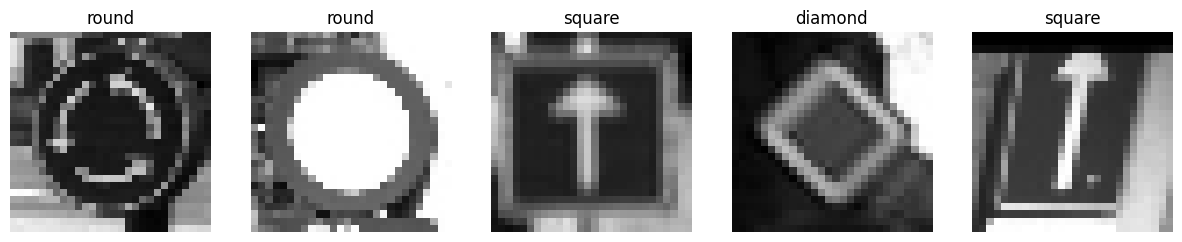

Samples from Type DataFrame:


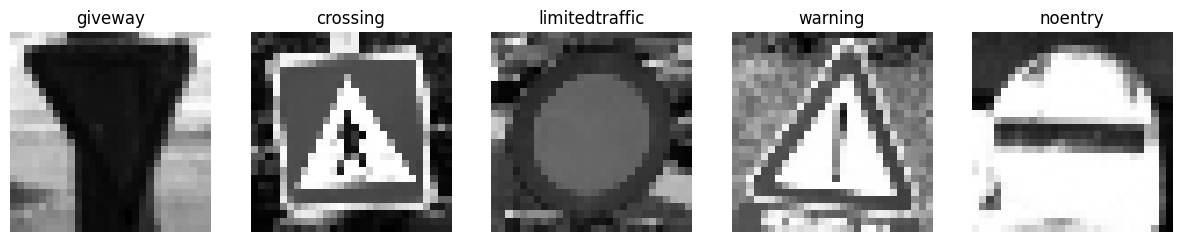

In [ ]:
import matplotlib.pyplot as plt
def plot_samples(data_df, num_samples=5):
    """
    Function to plot sample images from a DataFrame along with their labels.

    Args:
    - data_df (DataFrame): DataFrame containing image data and labels.
    - num_samples (int): Number of samples to plot.

    Returns:
    - None
    """

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i in range(num_samples):
        sample = data_df.sample()  # Sampling from the DataFrame passed as input
        image = sample['image'].values[0]  # Assuming 'image' contains the image data
        label = sample['shape_label'].values[0] if 'shape_label' in data_df.columns else sample['type_label'].values[0]
        axes[i].imshow(image, cmap='gray')  # Assuming grayscale images
        axes[i].set_title(label)
        axes[i].axis('off')

    plt.show()


# Plot sample images from the shape DataFrame
print("Samples from Shape DataFrame:")
plot_samples(shape_df)

# Plot sample images from the type DataFrame
print("Samples from Type DataFrame:")
plot_samples(type_df)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the shape labels
shape_labels_encoded = label_encoder.fit_transform(shape_df['shape_label'])

# Add the encoded labels as a new column in shape_df
shape_df['encoded_shape_label'] = shape_labels_encoded

# Display the updated shape_df
shape_df.head()

,image_path,image,shape_label,encoded_shape_label
0,/content/drive/My Drive/Assignment2/trafficsig...,"[[60, 64, 47, 39, 46, 33, 30, 33, 19, 24, 15, ...",square,3
1,/content/drive/My Drive/Assignment2/trafficsig...,"[[73, 63, 59, 55, 46, 51, 52, 52, 61, 56, 57, ...",square,3
2,/content/drive/My Drive/Assignment2/trafficsig...,"[[255, 255, 255, 255, 255, 254, 254, 254, 255,...",square,3
3,/content/drive/My Drive/Assignment2/trafficsig...,"[[37, 31, 30, 31, 30, 42, 37, 36, 35, 37, 35, ...",square,3
4,/content/drive/My Drive/Assignment2/trafficsig...,"[[117, 88, 77, 96, 87, 72, 79, 91, 80, 78, 76,...",square,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the type labels
type_labels_encoded = label_encoder.fit_transform(type_df['type_label'])

# Add the encoded labels as a new column in type_df
type_df['encoded_type_label'] = type_labels_encoded

# Display the updated type_df
type_df.head()

,image_path,image,type_label,encoded_type_label
0,/content/drive/My Drive/Assignment2/trafficsig...,"[[60, 64, 47, 39, 46, 33, 30, 33, 19, 24, 15, ...",crossing,2
1,/content/drive/My Drive/Assignment2/trafficsig...,"[[73, 63, 59, 55, 46, 51, 52, 52, 61, 56, 57, ...",crossing,2
2,/content/drive/My Drive/Assignment2/trafficsig...,"[[255, 255, 255, 255, 255, 254, 254, 254, 255,...",crossing,2
3,/content/drive/My Drive/Assignment2/trafficsig...,"[[37, 31, 30, 31, 30, 42, 37, 36, 35, 37, 35, ...",crossing,2
4,/content/drive/My Drive/Assignment2/trafficsig...,"[[117, 88, 77, 96, 87, 72, 79, 91, 80, 78, 76,...",crossing,2


In [ ]:
print("Unique shapes:", shape_df['shape_label'].unique())
print("numbers of shape:", len(shape_df['shape_label'].unique()))

Unique shapes: ['square' 'triangle' 'hex' 'round' 'diamond']
numbers of shape: 5


In [ ]:
print("Unique shapes:", type_df['type_label'].unique())
print("numbers of shape:", len(type_df['type_label'].unique()))

Unique shapes: ['crossing' 'laneend' 'parking' 'continue' 'giveway' 'warning' 'stop'
 'limitedtraffic' 'noparking' 'speed' 'noentry' 'trafficdirective'
 'roundabout' 'bicycle' 'traveldirection' 'rightofway']
numbers of shape: 16


## **1.4 Data Distribution**


### **1.4.1 Distribution of images per type class**

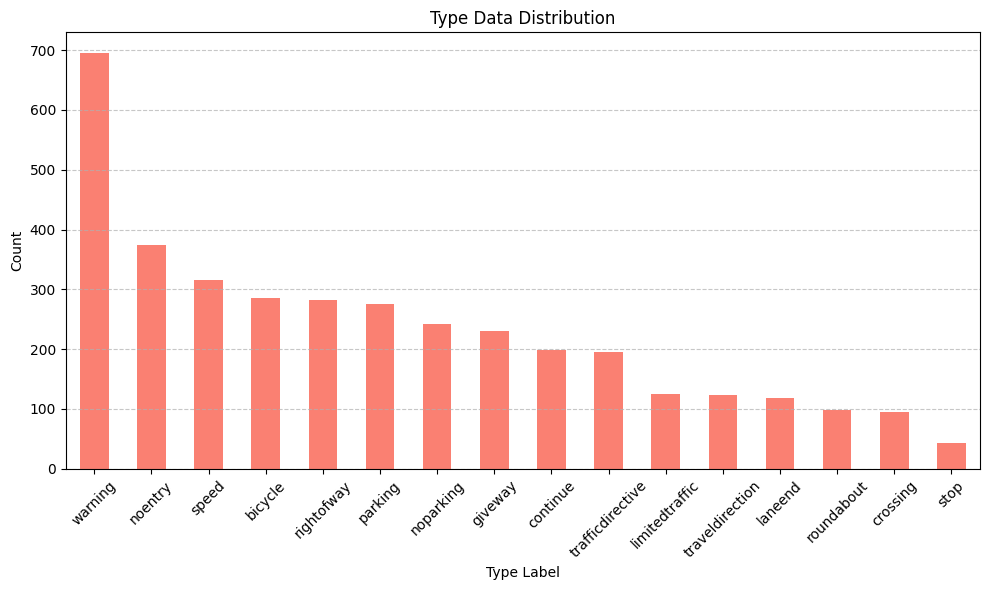

In [ ]:
def visualize_data_distribution(data_df, title):
    """
    Function to visualize the distribution of data.

    Args:
    - data_df (DataFrame): Pandas DataFrame containing the data.
    - title (str): Title for the plot.
    """
    plt.figure(figsize=(10, 6))
    data_counts = data_df['type_label'].value_counts()
    data_counts.plot(kind='bar', color='salmon')
    plt.title(title)
    plt.xlabel('Type Label')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Visualize data distribution for type DataFrame
visualize_data_distribution(type_df, 'Type Data Distribution')


**Observations:**
- The distribution of images per class is imbalanced, but not as severe as the class distribution for type.
- This imbalance could potentially affect the performance of a machine-learning model trained on this data, but to a lesser extent than the type data.

### **1.4.2 Distribution of images per shape class**

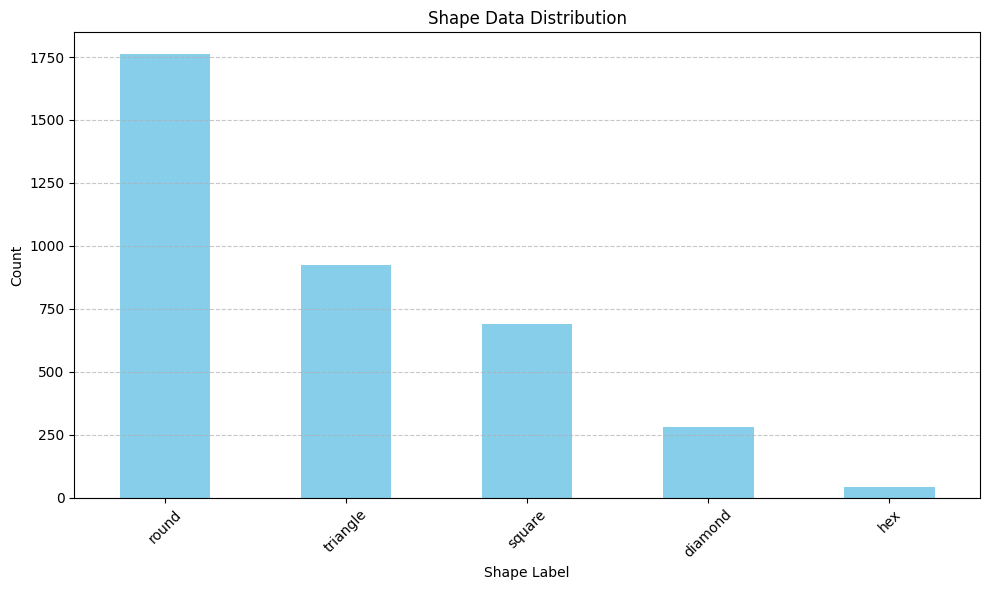

In [ ]:
import matplotlib.pyplot as plt

def visualize_data_distribution(data_df, title):
    """
    Function to visualize the distribution of data.

    Args:
    - data_df (DataFrame): Pandas DataFrame containing the data.
    - title (str): Title for the plot.
    """
    plt.figure(figsize=(10, 6))
    data_counts = data_df['shape_label'].value_counts()
    data_counts.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Shape Label')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Visualize data distribution for shape DataFrame
visualize_data_distribution(shape_df, 'Shape Data Distribution')


**Observations:**
- The distribution of images per class is highly imbalanced.
- This imbalance could potentially affect the performance of a machine-learning model trained on this data.

==========================================================================================================



# **2 Data Preparation**


## **2.1 Data spliting:  Train, Val and Test**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling and Formatting the Images
datagen_shape = ImageDataGenerator(rescale=1./255, data_format='channels_last')

# Initialize lists to store training, validation, and testing data for shape and type data
X_shape_train = []
X_shape_val = []
X_shape_test = []
y_shape_train = []
y_shape_val = []
y_shape_test = []

X_type_train = []
X_type_val = []
X_type_test = []
y_type_train = []
y_type_val = []
y_type_test = []

# Split data into groups based on shape labels
shape_groups = shape_df.groupby('shape_label')

# Split data into groups based on type labels
type_groups = type_df.groupby('type_label')

# Split each shape group into training, validation, and testing sets
for label, group in shape_groups:
    print(f"\nShape group label: {label}, Shape: {group.shape[0]}")
    X_train, X_temp, y_train, y_temp = train_test_split(group['image_path'], group['encoded_shape_label'], test_size=0.2, stratify=group['shape_label'])
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp)
    X_shape_train.extend(X_train)
    X_shape_val.extend(X_val)
    X_shape_test.extend(X_test)
    y_shape_train.extend(y_train)
    y_shape_val.extend(y_val)
    y_shape_test.extend(y_test)
    print(f"Train sample size: {len(X_train)}, Validation sample size: {len(X_val)}, Test sample size: {len(X_test)}")

# Split each type group into training, validation, and testing sets
for label, group in type_groups:
    print(f"\nType group label: {label}, Shape: {group.shape[0]}")
    X_train, X_temp, y_train, y_temp = train_test_split(group['image_path'], group['encoded_type_label'], test_size=0.2, stratify=group['type_label'])
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp)
    X_type_train.extend(X_train)
    X_type_val.extend(X_val)
    X_type_test.extend(X_test)
    y_type_train.extend(y_train)
    y_type_val.extend(y_val)
    y_type_test.extend(y_test)
    print(f"Train sample size: {len(X_train)}, Validation sample size: {len(X_val)}, Test sample size: {len(X_test)}")

# Convert to numpy arrays for shape data
X_shape_train = np.array(X_shape_train)
X_shape_val = np.array(X_shape_val)
X_shape_test = np.array(X_shape_test)
y_shape_train = np.array(y_shape_train)
y_shape_val = np.array(y_shape_val)
y_shape_test = np.array(y_shape_test)

# Convert to numpy arrays for type data
X_type_train = np.array(X_type_train)
X_type_val = np.array(X_type_val)
X_type_test = np.array(X_type_test)
y_type_train = np.array(y_type_train)
y_type_val = np.array(y_type_val)
y_type_test = np.array(y_type_test)


# Convert label data to strings
y_shape_train = np.array(y_shape_train).astype(str)
y_shape_val = np.array(y_shape_val).astype(str)
y_shape_test = np.array(y_shape_test).astype(str)
y_type_train = np.array(y_type_train).astype(str)
y_type_val = np.array(y_type_val).astype(str)
y_type_test = np.array(y_type_test).astype(str)

# Print shapes of the data sets after splitting for shape data
print("\nShape of X_shape_train:", X_shape_train.shape)
print("Shape of X_shape_val:", X_shape_val.shape)
print("Shape of X_shape_test:", X_shape_test.shape)
print("Shape of y_shape_train:", y_shape_train.shape)
print("Shape of y_shape_val:", y_shape_val.shape)
print("Shape of y_shape_test:", y_shape_test.shape)

# Print shapes of the data sets after splitting for type data
print("\nShape of X_type_train:", X_type_train.shape)
print("Shape of X_type_val:", X_type_val.shape)
print("Shape of X_type_test:", X_type_test.shape)
print("Shape of y_type_train:", y_type_train.shape)
print("Shape of y_type_val:", y_type_val.shape)
print("Shape of y_type_test:", y_type_test.shape)



Shape group label: diamond, Shape: 282
Train sample size: 225, Validation sample size: 42, Test sample size: 15

Shape group label: hex, Shape: 43
Train sample size: 34, Validation sample size: 6, Test sample size: 3

Shape group label: round, Shape: 1760
Train sample size: 1408, Validation sample size: 264, Test sample size: 88

Shape group label: square, Shape: 688
Train sample size: 550, Validation sample size: 103, Test sample size: 35

Shape group label: triangle, Shape: 926
Train sample size: 740, Validation sample size: 139, Test sample size: 47

Type group label: bicycle, Shape: 285
Train sample size: 228, Validation sample size: 42, Test sample size: 15

Type group label: continue, Shape: 199
Train sample size: 159, Validation sample size: 30, Test sample size: 10

Type group label: crossing, Shape: 95
Train sample size: 76, Validation sample size: 14, Test sample size: 5

Type group label: giveway, Shape: 231
Train sample size: 184, Validation sample size: 35, Test sample si

## **2.2 Flatten the images**

In [ ]:
import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Function to flatten images
def flatten_images(X):
    flattened_images = []
    for image_path in X:
        image = Image.open(image_path)
        image = np.array(image)
        flattened_image = image.flatten()
        flattened_images.append(flattened_image)
    return np.array(flattened_images)

# Flatten the images for shape data in training and testing sets
X_shape_train_flat = flatten_images(X_shape_train)
X_shape_test_flat = flatten_images(X_shape_test)
X_shape_val_flat = flatten_images(X_shape_val)

# Flatten the images for type data in training and testing sets
X_type_train_flat = flatten_images(X_type_train)
X_type_val_flat = flatten_images(X_type_val)
X_type_test_flat = flatten_images(X_type_test)

# Print shapes of the flattened data sets
print("\nShape of X_shape_train_flat:", X_shape_train_flat.shape)
print("Shape of X_shape_val_flat:", X_shape_val_flat.shape)
print("Shape of X_shape_test_flat:", X_shape_test_flat.shape)


print("\nShape of X_type_train_flat:", X_type_train_flat.shape)
print("Shape of X_type_val_flat:", X_type_val_flat.shape)
print("Shape of X_type_test_flat:", X_type_test_flat.shape)


Shape of X_shape_train_flat: (2957, 784)
Shape of X_shape_val_flat: (554, 784)
Shape of X_shape_test_flat: (188, 784)

Shape of X_type_train_flat: (2954, 784)
Shape of X_type_val_flat: (553, 784)
Shape of X_type_test_flat: (192, 784)


=================================================================================================

# **3. Model development**

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("Epochs")
    plt.ylabel(metric_name)
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()


## **3.1 Basline Model**

In [ ]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.__version__

'2.15.0'

In [ ]:
from tensorflow.keras.utils import to_categorical

y_shape_train_cat = to_categorical(y_shape_train)
y_shape_val_cat = to_categorical(y_shape_val)
y_shape_test_cat = to_categorical(y_shape_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(X_shape_train_flat.shape[1],)),
    Dense(64, activation='sigmoid'),
    Dense(y_shape_train_cat.shape[1], activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_shape_train_flat, y_shape_train_cat, epochs=10, validation_data=(X_shape_val_flat, y_shape_val_cat))


Epoch 1/10
93/93 [==============================] - 2s 8ms/step - loss: 1.2699 - accuracy: 0.4718 - val_loss: 1.2399 - val_accuracy: 0.4765
Epoch 2/10
93/93 [==============================] - 1s 5ms/step - loss: 1.2306 - accuracy: 0.5039 - val_loss: 1.2277 - val_accuracy: 0.4765
Epoch 3/10
93/93 [==============================] - 0s 5ms/step - loss: 1.2017 - accuracy: 0.5056 - val_loss: 1.1719 - val_accuracy: 0.4765
Epoch 4/10
93/93 [==============================] - 0s 5ms/step - loss: 1.1644 - accuracy: 0.5370 - val_loss: 1.1342 - val_accuracy: 0.4765
Epoch 5/10
93/93 [==============================] - 1s 6ms/step - loss: 1.1771 - accuracy: 0.5242 - val_loss: 1.1274 - val_accuracy: 0.6354
Epoch 6/10
93/93 [==============================] - 0s 5ms/step - loss: 1.2265 - accuracy: 0.4988 - val_loss: 1.2584 - val_accuracy: 0.4765
Epoch 7/10
93/93 [==============================] - 1s 5ms/step - loss: 1.2685 - accuracy: 0.4762 - val_loss: 1.2579 - val_accuracy: 0.4765
Epoch 8/10
93/93 [==

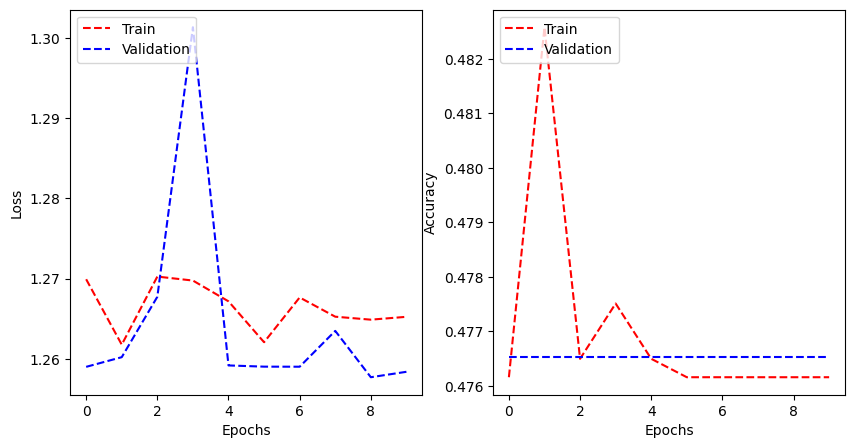

In [ ]:
plot_learning_curve(history.history['loss'], history.history['val_loss'],
                    history.history['accuracy'], history.history['val_accuracy'],
                    metric_name='Accuracy')


**Observations:**

- The model exhibits overfitting, as the training accuracy increases while the validation accuracy stagnates or even decreases after a certain number of epochs.
- This suggests that the model is memorizing the training data but not generalizing well to unseen data.
- To address this issue, techniques such as regularization or data augmentation can be explored.

### **3.1.1Shape prediction**

In [ ]:
import tensorflow as tf

model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, None, None, 5) are incompatible


train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_type_train,
    directory='./data/train',
    x_col='image_path',
    y_col='encoded_class',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=20,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=X_type_val,
    directory='./data/validation',
    x_col='image_path',
    y_col='encoded_class',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=20,
    class_mode='categorical'
)


In [ ]:
import tensorflow as tf

model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])


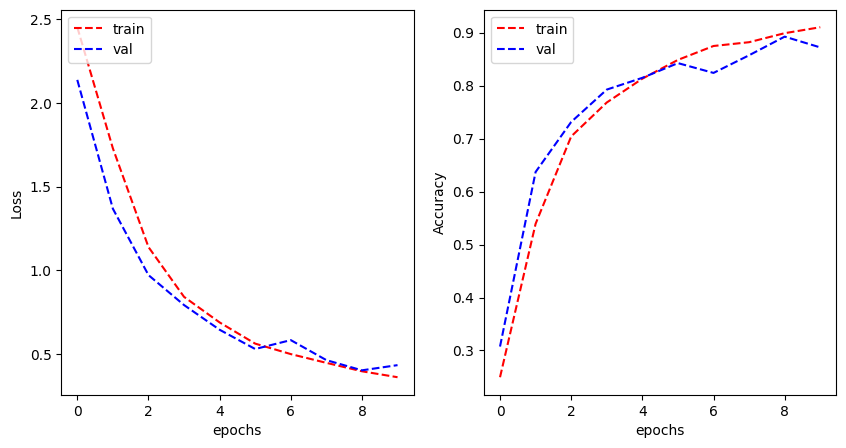

In [ ]:
plot_learning_curve(history.history['loss'], history.history['val_loss'],
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'],
                    metric_name='Accuracy')

In [ ]:
label_names = {'Landeed' : 0, 'Continue' : 1, 'Crossing' : 2, 'Parking' : 3, 'Bicycle' : 4 ,'Trafficdirective' : 5, 'Traveldirection' : 6, 'Noentry' : 7, 'roundabout' : 8, 'speed' : 9,'noparking' : 10, 'limitedtraffic' : 11, 'Stop' : 12, 'Rightofway' : 13, 'Giveway' : 14, 'Warning' :15 }

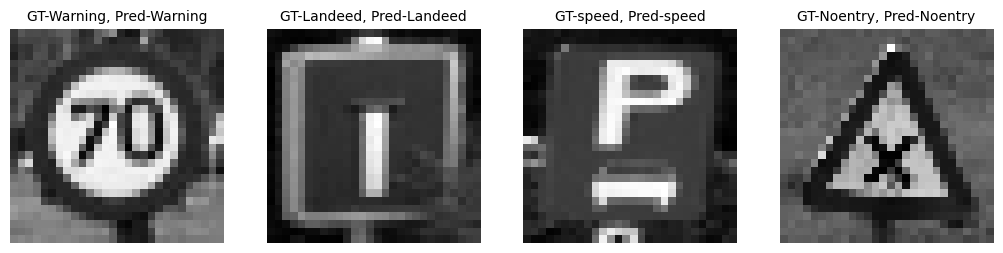

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16, 4))
batches = 0

for x, y in train_generator:
    batches += 1
    y_hat = model.predict(x, verbose=0)
    x = np.squeeze(x[0])

    if batches < 5:
        plt.subplot(1, 5, batches)
        plt.imshow(x, cmap='gray')
        plt.title(f"GT-{d_inv[np.argmax(y[0])]}, Pred-{d_inv[np.argmax(y_hat[0])]}", fontsize=10)
        plt.axis('off')
    else:
        break
plt.show()

=====================================================================================================

# **Data Augmentation**

**Recognizing the imbalance in our data, we plan to explore whether supplementing the smaller classes with augmented data can enhance the accuracy of our model. In this section, we will establish new folders to house the augmented datasets derived from the original training data.**

In [ ]:
# Determine the maximum count in any single category
max_count = max([len(group) for label, group in shape_groups])

# Calculate augmentation needs for each category
augment_needs = {}
for label, group in shape_groups:
    current_count = len(group)
    augment_needs[label] = max(0, max_count - current_count)  # Only augment if needed


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

# Initialize the ImageDataGenerator with transformations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)

# Augment the images based on their needs
augmented_images = []
for label, group in shape_groups:
    images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in group['image_path']]
    num_to_augment = augment_needs[label]
    augmented_count = 0

    for img in images:
        if augmented_count >= num_to_augment:
            break
        img = cv2.resize(img, (28, 28))
        img = img.reshape(1, 28, 28, 1)  # Reshape to fit the ImageDataGenerator requirements
        aug_iter = datagen.flow(img, batch_size=1)

        for _ in range(5):  # Generate multiple augmented images from each original image
            aug_img = next(aug_iter)[0]
            augmented_images.append(aug_img)
            augmented_count += 1
            if augmented_count >= num_to_augment:
                break


Shape group label: diamond, Train: 225, Test: 57
Shape group label: hex, Train: 34, Test: 9
Shape group label: round, Train: 1408, Test: 352
Shape group label: square, Train: 550, Test: 138
Shape group label: triangle, Train: 740, Test: 186


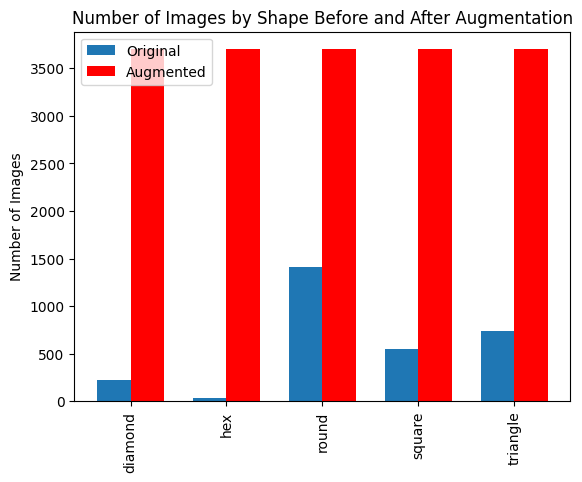

In [ ]:
# Initialize shape_counts for both 'original' and 'augmented'
shape_counts = {label: {'original': 0, 'augmented': 0} for label in shape_groups.groups.keys()}
# Split each shape group into training and testing sets and update counts
for label, group in shape_groups:
    X_train, X_test, y_train, y_test = train_test_split(
        group['image_path'], group['encoded_shape_label'], test_size=0.2, stratify=group['shape_label'])
    shape_counts[label]['original'] += len(X_train)  # Update original count with the number of training images
    print(f"Shape group label: {label}, Train: {len(X_train)}, Test: {len(X_test)}")
# Assuming you track augmented images correctly
for label, group in shape_groups:
    # Simulate augmenting images
    num_augments = 5 * len(X_train)  # Assuming you augment each image 5 times
    shape_counts[label]['augmented'] += num_augments  # Update augmented count
# Plotting the distribution of images for shapes
labels, original_counts, augmented_counts = zip(*[
    (label, counts['original'], counts['augmented']) for label, counts in shape_counts.items()
])

indexes = np.arange(len(labels))
width = 0.35

plt.bar(indexes, original_counts, width, label='Original')
plt.bar(indexes + width, augmented_counts, width, label='Augmented', color='red')

plt.ylabel('Number of Images')
plt.title('Number of Images by Shape Before and After Augmentation')
plt.xticks(indexes + width / 2, labels, rotation='vertical')
plt.legend()
plt.show()


**Observations:**

- After applying augmentation, the number of images in each shape category is now balanced.
- This augmentation approach can potentially improve the performance of a machine-learning model trained on this data by providing more representative data for each shape class.

type group label: bicycle, Train: 228, Test: 57
type group label: continue, Train: 159, Test: 40
type group label: crossing, Train: 76, Test: 19
type group label: giveway, Train: 184, Test: 47
type group label: laneend, Train: 94, Test: 24
type group label: limitedtraffic, Train: 100, Test: 25
type group label: noentry, Train: 300, Test: 75
type group label: noparking, Train: 193, Test: 49
type group label: parking, Train: 220, Test: 56
type group label: rightofway, Train: 225, Test: 57
type group label: roundabout, Train: 78, Test: 20
type group label: speed, Train: 252, Test: 64
type group label: stop, Train: 34, Test: 9
type group label: trafficdirective, Train: 156, Test: 39
type group label: traveldirection, Train: 99, Test: 25
type group label: warning, Train: 556, Test: 139


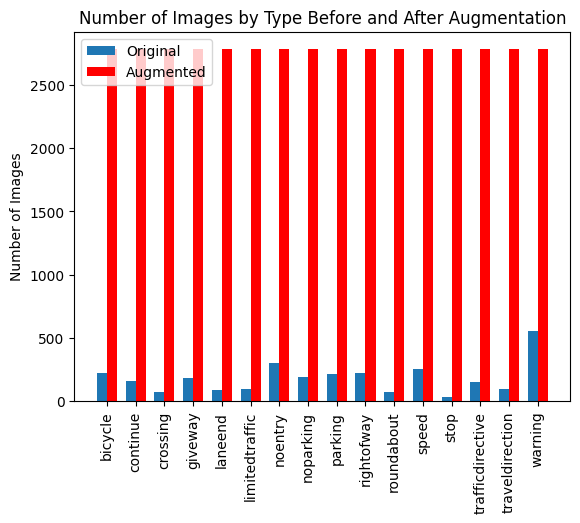

In [ ]:
# Initialize type_counts for both 'original' and 'augmented'
type_counts = {label: {'original': 0, 'augmented': 0} for label in type_groups.groups.keys()}
# Split each type group into training and testing sets and update counts
for label, group in type_groups:
    X_train, X_test, y_train, y_test = train_test_split(
        group['image_path'], group['encoded_type_label'], test_size=0.2, stratify=group['type_label'])
    type_counts[label]['original'] += len(X_train)  # Update original count with the number of training images
    print(f"type group label: {label}, Train: {len(X_train)}, Test: {len(X_test)}")
# Assuming you track augmented images correctly
for label, group in type_groups:
    # Simulate augmenting images
    num_augments = 5 * len(X_train)  # Assuming you augment each image 5 times
    type_counts[label]['augmented'] += num_augments  # Update augmented count
# Plotting the distribution of images for shapes
labels, original_counts, augmented_counts = zip(*[
    (label, counts['original'], counts['augmented']) for label, counts in type_counts.items()
])

indexes = np.arange(len(labels))
width = 0.35

plt.bar(indexes, original_counts, width, label='Original')
plt.bar(indexes + width, augmented_counts, width, label='Augmented', color='red')

plt.ylabel('Number of Images')
plt.title('Number of Images by Type Before and After Augmentation')
plt.xticks(indexes + width / 2, labels, rotation='vertical')
plt.legend()
plt.show()

**Observations:**

- After applying augmentation, the number of images in each type category is now more balanced.
- This augmentation approach can potentially improve the performance of a
machine-learning model trained on this data by providing more representative data for each type class.
